<a href="https://colab.research.google.com/github/SimonGodskesen/CNTProject/blob/main/Project_in_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Load MNIST Data

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

batch_size = 5
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



View some of the images

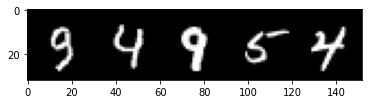

In [3]:
#imshow taken from https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

train_iterator = iter(trainloader)
images, labels = next(train_iterator)
imshow(torchvision.utils.make_grid(images))

In [ ]:
Create Neural Network

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 3, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(3, 10, 5)
        self.fc1 = nn.Linear(160, 100)
        self.fc2 = nn.Linear(100, 60)
        self.fc3 = nn.Linear(60, 10)
        
        #self.conv1 = nn.Conv2d(3, 6, 5)
        #self.pool = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        #self.fc1 = nn.Linear(16 * 5 * 5, 120)
        #self.fc2 = nn.Linear(120, 84)
        #self.fc3 = nn.Linear(84, 10)
        
        
    def forward(self, x):
        x = self.pool(torch.sigmoid(self.conv1(x)))
        x = self.pool(torch.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
    
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

Train Model

In [5]:
for epoch in range(3):
    current_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        current_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {current_loss / 2000:.3f}')
        current_loss = 0.0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[1,  2000] loss: 0.001
[1,  4000] loss: 0.001
[1,  6000] loss: 0.001
[1,  8000] loss: 0.001
[1, 10000] loss: 0.001
[1, 12000] loss: 0.001
[2,  2000] loss: 0.001
[2,  4000] loss: 0.001
[2,  6000] loss: 0.001
[2,  8000] loss: 0.001
[2, 10000] loss: 0.001
[2, 12000] loss: 0.001
[3,  2000] loss: 0.001
[3,  4000] loss: 0.001
[3,  6000] loss: 0.001
[3,  8000] loss: 0.001
[3, 10000] loss: 0.001
[3, 12000] loss: 0.001


View parameters, and calculate node strength of first node in linear layer

In [ ]:
weight_layer1 = net.fc1.weight.data
weight_layer2 = net.fc2.weight.data
weight_layer3 = net.fc3.weight.data
bias_layer1 = net.fc1.bias.data
bias_layer2 = net.fc2.bias.data
bias_layer3 = net.fc3.bias.data

print(weight_layer1.size(dim=0))
print(weight_layer2.size())
print(weight_layer3.size())
print(bias_layer1.size(dim=0))

node_strength_node1_1 = 0
for i in range(weight_layer1.size(dim=0)):
    node_strength_node1_1 += weight_layer1[i, 0]
for b in range(bias_layer1.size(dim=0)):
    node_strength_node1_1 += bias_layer1[b]
for j in range(weight_layer2.size(dim=1)):
    node_strength_node1_1 += weight_layer2[0, j]
print(node_strength_node1_1)
    

100
torch.Size([60, 100])
torch.Size([10, 60])
100
tensor(-179.5608)
